In [1]:
%%bash

pip install -q kaggle
mkdir -p ~/.kaggle
cp drive/MyDrive/kaggle.json ~/.kaggle/
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download -d faizalkarim/cleandirty-road-classification
unzip -qq cleandirty-road-classification.zip

100%|██████████| 71.6M/71.6M [00:02<00:00, 29.6MB/s]


# Clean-Diry Road Classification 😄

## Importing required libraries 🙃

In [2]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image

## Getting Dataset 😊

In [3]:
mdata = pd.read_csv("metadata.csv")
train_data = mdata[:int(0.8 * len(mdata))]
val_data = mdata[int(0.8 * len(mdata)):]

## Pre-Processing 🥴

In [4]:
def preprocess_image(df_data):
  file_path = "Images/Images/"
  image_data = []
  image_labels = []
  df_data = df_data.values
  for i in range(len(df_data)):
    try:
      image = tf.io.read_file(file_path + df_data[i][0])
      image = tf.image.decode_jpeg(image, channels=3)
      image = tf.image.resize(image, (224, 224))
      image /= 255.0  # normalize to [0,1] range
      image_data.append(image)
      image_labels.append(df_data[i][1])
    except:
      filename = df_data[i][0]
      pass
  
  return image_data, image_labels

In [5]:
train_images, train_labels = preprocess_image(train_data)
len(train_images), len(train_labels)

(177, 177)

In [6]:
val_images, val_labels = preprocess_image(val_data)
len(val_images), len(val_labels)

(45, 45)

In [7]:
train_images = np.array(train_images)
val_images = np.array(val_images)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

## Building Neural Network 🫠

In [8]:
base_model = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [9]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27,560,769
Trainable params: 12,846,081
Non-tra

In [12]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## Let's Train Model 😈

In [13]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
6/6 [==============================] - 17s 1s/step - loss: 2.8388 - accuracy: 0.6667 - val_loss: 1.1850 - val_accuracy: 0.6444
Epoch 2/10
6/6 [==============================] - 1s 180ms/step - loss: 0.5549 - accuracy: 0.8362 - val_loss: 0.6172 - val_accuracy: 0.8667
Epoch 3/10
6/6 [==============================] - 1s 181ms/step - loss: 0.2961 - accuracy: 0.9322 - val_loss: 0.0824 - val_accuracy: 0.9778
Epoch 4/10
6/6 [==============================] - 1s 154ms/step - loss: 0.0420 - accuracy: 0.9774 - val_loss: 0.0952 - val_accuracy: 0.9778
Epoch 5/10
6/6 [==============================] - 1s 153ms/step - loss: 0.0437 - accuracy: 0.9887 - val_loss: 0.0688 - val_accuracy: 0.9778
Epoch 6/10
6/6 [==============================] - 1s 180ms/step - loss: 0.0096 - accuracy: 0.9944 - val_loss: 0.0938 - val_accuracy: 0.9778
Epoch 7/10
6/6 [==============================] - 1s 180ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1260 - val_accuracy: 0.9778
Epoch 8/10
6/6 [======

## Making Prediction 😍😘🥰

In [52]:
import matplotlib.pyplot as plt

def predict_clean_or_dirty(image_loc):
  test_image = image.load_img(image_loc, target_size=(224, 224))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  test_image /= 255.0
  result = model.predict(test_image)
  print(result)
  if result < 0.5:
    result = "Clean"
  else:
    result = "Dirty"

  plt.imshow(np.uint8(test_image[0] * 255))
  plt.title(result)
  plt.show()

--2023-02-11 07:55:43--  https://www.indiastockphoto.com/wp-content/uploads/2020/11/Ladakh-mountain-highway-road.jpg
Resolving www.indiastockphoto.com (www.indiastockphoto.com)... 156.67.65.67, 2a02:4780:b:628:0:1d6d:96a2:3
Connecting to www.indiastockphoto.com (www.indiastockphoto.com)|156.67.65.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151063 (148K) [image/jpeg]
Saving to: ‘Ladakh-mountain-highway-road.jpg.4’

Ladakh-mountain-hig 100%[===================>] 147.52K   321KB/s    in 0.5s    

2023-02-11 07:55:44 (321 KB/s) - ‘Ladakh-mountain-highway-road.jpg.4’ saved [151063/151063]

1/1 [==============================] - 0s 37ms/step
[[0.13126491]]


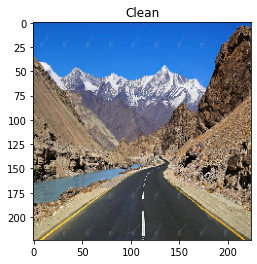

In [53]:
!wget https://www.indiastockphoto.com/wp-content/uploads/2020/11/Ladakh-mountain-highway-road.jpg

filename_to_pred = "Ladakh-mountain-highway-road.jpg"

predict_clean_or_dirty(filename_to_pred)

--2023-02-11 07:56:20--  https://images.assettype.com/thequint/2016-06/145f9a35-e99f-4fb1-ad44-799ee6928fa4/India-Road-Accident_Webf.jpg
Resolving images.assettype.com (images.assettype.com)... 104.22.26.212, 104.22.27.212, 172.67.27.232, ...
Connecting to images.assettype.com (images.assettype.com)|104.22.26.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2189053 (2.1M) [image/jpeg]
Saving to: ‘India-Road-Accident_Webf.jpg’

India-Road-Accident 100%[===================>]   2.09M  5.87MB/s    in 0.4s    

2023-02-11 07:56:21 (5.87 MB/s) - ‘India-Road-Accident_Webf.jpg’ saved [2189053/2189053]

1/1 [==============================] - 0s 41ms/step
[[0.99999595]]


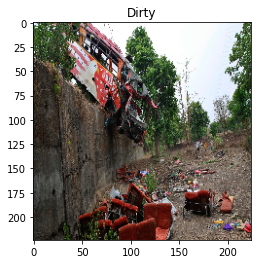

In [54]:
!wget https://images.assettype.com/thequint/2016-06/145f9a35-e99f-4fb1-ad44-799ee6928fa4/India-Road-Accident_Webf.jpg

filename_to_pred = "India-Road-Accident_Webf.jpg"

predict_clean_or_dirty(filename_to_pred)